```
Topic:    Challenge Set 1
Subject:  Pandas
Date:     02/03/2017
Name:     Prashant Tatineni
```

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import dateutil.parser
import numpy as np

%matplotlib inline

In [11]:
df = pd.read_csv('2013_movies.csv')

In [12]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


**Challenge 1**

In [13]:
df['ReleaseDateParsed'] = df.ReleaseDate.apply(lambda x: dateutil.parser.parse(x))

In [14]:
zerotime = dateutil.parser.parse('2012-12-31')

In [15]:
df['Days'] = (df.ReleaseDateParsed - zerotime)
df['Days'] = df.Days.apply(lambda x: x.days)

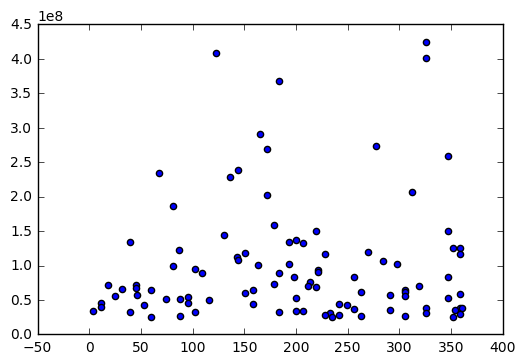

In [68]:
plt.scatter(df.Days, df.DomesticTotalGross);

**Challenge 2**

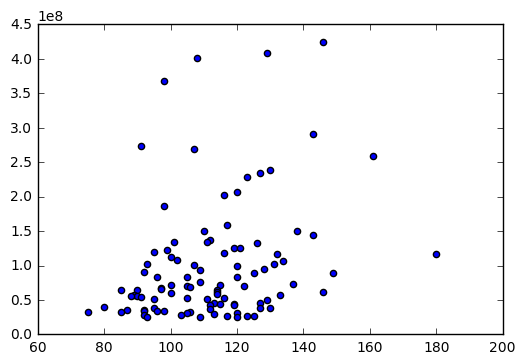

In [70]:
plt.scatter(df.Runtime, df.DomesticTotalGross);

**Challenge 3**

In [16]:
(df.groupby('Rating').mean())[['Runtime','DomesticTotalGross']]

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


**Challenge 4**

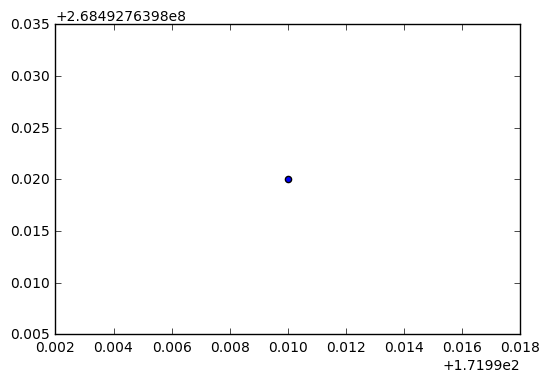

In [27]:
x = df[df.Rating == 'G']['Days']
y = df[df.Rating == 'G']['DomesticTotalGross']
plt.scatter(x,y);

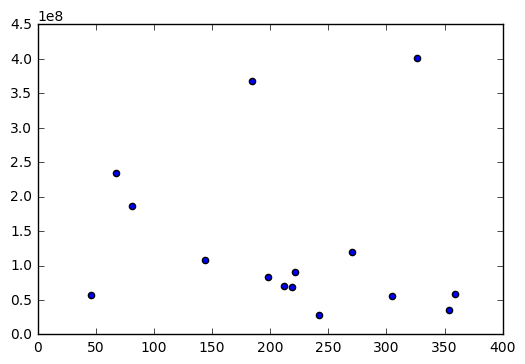

In [23]:
x = df[df.Rating == 'PG']['Days']
y = df[df.Rating == 'PG']['DomesticTotalGross']
plt.scatter(x,y);

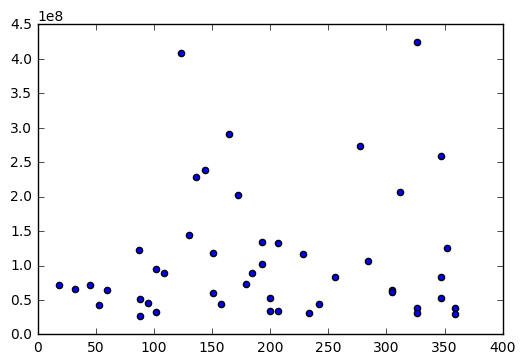

In [24]:
x = df[df.Rating == 'PG-13']['Days']
y = df[df.Rating == 'PG-13']['DomesticTotalGross']
plt.scatter(x,y);

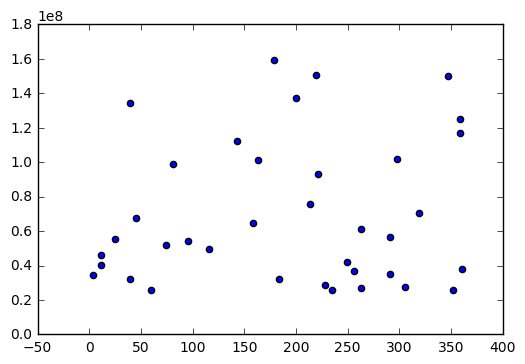

In [25]:
x = df[df.Rating == 'R']['Days']
y = df[df.Rating == 'R']['DomesticTotalGross']
plt.scatter(x,y);

**Challenge 5**

In [33]:
(df.groupby('Director').mean())[['DomesticTotalGross']].sort_values('DomesticTotalGross', ascending=False).head(1)

,DomesticTotalGross
Director,
Francis Lawrence,424668047.0


**Challenge 6**

In [38]:
df['Month'] = df['ReleaseDateParsed'].apply(lambda x: x.month)

In [78]:
# Months
i = [1,2,3,4,5,6,7,8,9,10,11,12]

# Mean
m = (df.groupby('Month').mean())

# Standard Deviation
s = (df.groupby('Month').std())

# Calculate Standard Error
n = (df.groupby('Month').count())
sem = s.DomesticTotalGross/np.sqrt(n.DomesticTotalGross)

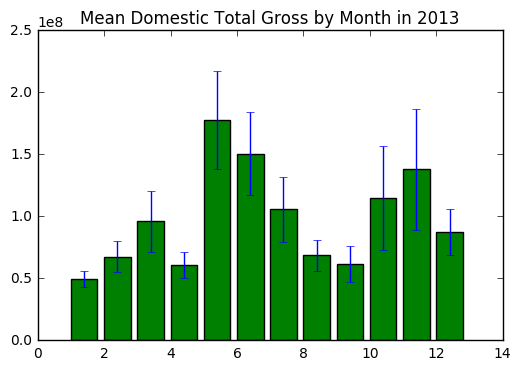

In [83]:
plt.bar(i, m.DomesticTotalGross, color='green', yerr=sem);
plt.title('Mean Domestic Total Gross by Month in 2013');